# Mini project on implementation of machine learning methods

## How to work on the project
To work on your project you need to open the `Practical_work.ipynb` file through Jupyter notebook or your editor of choice.
A separate `PDF` file contains the script that you need to follow with snippets of code that you will need to add to your notebook.
There are segements where you need to create your own code, or add your own comments. These are all indicated with the note **ToDo**.
For some of the tasks, you may need to revisit the lecture notes to check some of the code examples that were presented there.


# Description
In this project you will work with a dataset holding information about potential bank clients seeking to get a loan.
The dataset holds information about their employment, family, age, and financial state. The purpose is to use this information to explore the potential risk of an individual to default on a loan. In the dataset this is reflected on the feature `debt` which indicates if a person has defaulted in the payments of a loan.

## Description of the features in the dataset
- children: the number of children in the family 
- days_employed: how long the customer has worked 
- dob_years: the customer’s age 
- education: the customer’s education level 
- education_id: identifier for the customer’s education 
- family_status: the customer’s marital status 
- family_status_id: identifier for the customer’s marital status 
- gender: the customer’s gender 
- income_type: the customer’s income type 
- debt: whether the client has ever defaulted on a loan 
- total_income: annual income 
- purpose: reason for taking out a loan written by the client
- purpose-short: processed fixed text representing the purpose for the loan

## Objective
The dataset is not cleaned. As part of this assignment you will need to clean your dataset and prepare it for further data analysis.

.

### Loading libraries

In [1]:
# Add code from script
import pandas as pd

## Exploring the dataset
Read the dataset from the csv file.

In [2]:
# Add code from script
df = pd.read_csv('credit_scoring_pre.csv')

#### ToDo

Explore your dataset. Use the functions __[head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)__, __[info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)__, and __[describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)__ on the dataframe and see their outputs.

In [3]:
# ToDo: Check head
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_short
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house,house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase,car
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house,house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education,education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding,wedding


In [4]:
# ToDo: Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
 12  purpose_short     21525 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


In [5]:
# ToDo: Check describe
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Question
What do you notice about your dataset?

Are there any missing values?

Are the value ranges as expected? Do you see any attributes having abnormally high or low values?

Do you see any features that may require transformations in order for the dataset to be ready for training a ML model?

Are there any redundand features?

### ToDo: write your observations


**1. What do you notice about the dataset?**  
The dataset contains **21,525 records** and **13 features** describing clients’ demographics, income, loan purpose, and debt status. Many columns are categorical, while `days_employed` and `total_income` are continuous variables.



**2. Are there any missing values?**  
Yes. Two columns have missing data:
- `days_employed`: **2,174 missing values**
- `total_income`: **2,174 missing values**  
These will require imputation.



**3. Are the value ranges as expected? Any abnormal values?**  
- `days_employed` has **negative values** (e.g., *-18,388*) and **extremely large positive values** (up to *401,755 days ≈ 1,100 years*), which are clearly unrealistic.  
- `children` has a **minimum of -1**, which is invalid.  
- `dob_years` ranges from **0 to 75**, and age = 0 is likely an error.

These values will need correction.

---

**4. Do any features require transformations before ML training?**  
Yes:
- `days_employed` needs cleaning due to unrealistic negatives/outliers.  
- Categorical columns (`education`, `family_status`, `income_type`, etc.) need encoding.  
- Text-based columns (`purpose`) should be reduced to categories — already done via `purpose_short`.

---

**5. Are there any redundant features?**  
Yes, several columns duplicate information:
- `education` ↔ `education_id`  
- `family_status` ↔ `family_status_id`  
- `purpose` ↔ `purpose_short`  

We should keep the numeric or simplified versions and drop the textual duplicates.

---


### Negative values

Some values appear to be negative. We can assume that this was probably a data entry error.

We can replace them with positive values.

You need to create a function called `change_to_positive` which takes a single parameter. The fuction will just return the absolute value of the parameter, i.e. `abs(value)`, where `value` is the name of the parameter.

In [6]:
# ToDo: write function
import math
def change_to_positive(x):
    return abs(x)

In [7]:
change_to_positive(-1)

1

Now we can apply this function to all the items in the feature `children` and replace their existing value.

In [8]:
# Add code from script
df['children'] = df['children'].apply(change_to_positive)

In [9]:
# ToDo: Is there any other feature you need to correct?
# Apply the same function to any feature that has negative values
df['days_employed'] = df['days_employed'].apply(change_to_positive)

Check your dataset to ensure negative values are fixed.

In [10]:
# ToDo use the appropriate function to quickly check your dataset for negative values
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_short
0,1,8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house,house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase,car
2,0,5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house,house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education,education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding,wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions,house
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car,car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car,car


## Processing duplicates

The features with categorical data may contain duplicate values. We can get a quick view of all the values in a feature using the __[unique](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)__ function. First we can text the values of the field 'family_status':

In [11]:
# Add code from script
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

They seem fine. All are unique values.

Now try the 'education' feature. What do you observe?

In [12]:
# ToDo: check duplicate values on the 'education' feature
df['education'].unique()

array(['masters degree', 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', 'MASTERS DEGREE', 'bachelor degree',
       'primary education', 'Masters Degree', 'BACHELOR DEGREE',
       'Bachelor Degree', 'PRIMARY EDUCATION', 'Primary Education',
       'Academic Degree', 'ACADEMIC DEGREE', 'academic degree'],
      dtype=object)

Differences in the capitalisation of the words have created duplicate values. We need to fix this.

You need to create a function called `to_lower_value` which takes a single parameter. The fuction will just return the parameter converted to lower case, i.e. `value.lower()`

In [13]:
# ToDo: write function
def to_lower_value(value):
    return value.lower()
    

In [14]:
to_lower_value('Yarushah')

'yarushah'

Now we can apply this function to all the items in the feature 'education' and replace the existing values:

In [15]:
# Add code from script
df['education'] = df['education'].apply(to_lower_value)

Check again the values of the feature 'education'

In [16]:
# ToDo: check duplicates for 'education'
df['education'].unique()

array(['masters degree', 'secondary education', 'bachelor degree',
       'primary education', 'academic degree'], dtype=object)

### Feature 'purpose'

Check the duplicate values for both the features 'purpose' and 'purpose_short'. What do you observe?

Do you need both features in your dataset?

In [17]:
# ToDo: check duplicates for puprose
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car',
       'transactions with the residential real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get asupplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'property renovat

In [18]:
# ToDo: check duplicates for purpose_short
df['purpose_short'].unique()

array(['house', 'car', 'education', 'wedding', 'estate', 'property'],
      dtype=object)

If you need to remove one of the features you can use the Pandas method __[drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)__, i.e. `df.drop("column_name", axis=1)`

In [19]:
# ToDo: drop redundand feature
df.drop('purpose', axis=1)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_short
0,1,8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,145885.952297,house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,house
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,car


### Check all other categorical values for duplicates

Insert more coding blocks if necessary, using the buttons on the right.

In [20]:
print(df['family_status'].unique())
print(df['income_type'].unique())
print(df['gender'].unique())

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
['employee' 'retiree' 'partner' 'civil servant' 'unempoyed' 'entrepreneur'
 'student' 'paternity / maternity leave']
['F' 'M' 'XNA']


In [21]:
#ToDo check for duplicates
# Check all categorical columns for unique values
categorical_features = ['education', 'family_status', 'gender', 'income_type', 'purpose_short']
for col in categorical_features:
    print(f"{col}: {df[col].unique()}")


education: ['masters degree' 'secondary education' 'bachelor degree'
 'primary education' 'academic degree']
family_status: ['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
gender: ['F' 'M' 'XNA']
income_type: ['employee' 'retiree' 'partner' 'civil servant' 'unempoyed' 'entrepreneur'
 'student' 'paternity / maternity leave']
purpose_short: ['house' 'car' 'education' 'wedding' 'estate' 'property']


### Check point
Now all your values should be free from any duplicates.

## Processing missing values

You may have observed that some fields have null values. Hint: you can see this when you inspect the output of the `info()` function.

First we can extract all the samples that contain at least one null value.


In [22]:
# Add code from script
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
purpose_short          0
dtype: int64

*Explanation* 

The method `df.isnull()` returns for every field the value True/False if that field has a null value.

The method `.any(axis=1)` returns True for every row if at least one of the values in that row is 'True'. By chaining the two functions we produce a list with data frames with the value True/False to indicate if that frame has a null value.

The `df[...]` supports selections of items based on a boolean expression. In this case we select only the frames that have a null value.

In [23]:
# Add code from script
df[df.isnull().any(axis=1)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_short
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate,estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase,car
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding,wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,secondary education,1,married,0,M,partner,0,NaN,purchase of a car,car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,wedding
21497,0,NaN,48,masters degree,0,married,0,F,partner,0,NaN,building a property,property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate,estate


### ToDo
Go to your observations at the start and check the size of your dataset and how many missing values you have for each field.
- Dataset size: **add value**
- Missing values days_employed: **add value**
- Missing values total_income: **add value**


The `null_fields` dataframe seems to hold the same size of items as the number of missing values for each feature. That indicates that every frame that has a missing value for `days_employed` also holds a missing value for `total_income`.
That could initially indicate that maybe these frames represent unemployed people. We need to verify this.

In [24]:
# ToDo: check all the unique values for 'income_type' in the null_fields dataframe
null_rows = df[df['income_type'].isnull()]

In [25]:
null_rows['income_type'].value_counts()

Series([], Name: count, dtype: int64)

It appears that the missing values are not related to employment type.

It is likely that the values are missing because clients opted out from suplying such information.

The best approach would be to replace these null values with representative values from similar clients. I good approach would to see what is the median value for people with the same education level and income type, and asign these values for the missing values.

First we will filter all entries in our dataset for a given education level and income type. We use the `[<expression>]` selector, using a logical expression to filter specific records.

In [26]:
# Example: selecting all records with 'secondary education' and income 'employee'
find_median_data = df[ (df['education']=='secondary education') & (df['income_type']=='employee') ].copy()

# Print median values
find_median_data['days_employed'].median()

1613.581419770452

### ToDo Write a function

Using the code above as the example, write a function called `find_median` which should take two parameters `education` and `income`.
The function should extract the list of matching records for the specified education and income.
Then assign the median for `days_employed` to a variable `median_days`, and the median for `total_income` to a variable `median_income`.
The values should be returned as a list (the return line is provided).


In [32]:
# ToDo: complete the function
def find_median(education, income):
    find_median_data = df[ (df['education']=='secondary education') & (df['income_type']=='employee') ].copy()
    median_days = find_median_data['days_employed'].median()
    median_income = find_median_data['total_income'].median()
    # Write the body of the function here
    
    return [median_days, median_income]

# Test your function
find_median('secondary education', 'employee')

[1613.581419770452, 136555.10882100096]

Now we can write a for-loop to go through the records and replace the relevant values.

In [33]:
for i in df[df.isnull().any(axis=1)].index:
    median_result = find_median(df.loc[i,'education'], df.loc[i,'income_type'])
    df.loc[i,'days_employed'] = median_result[0]
    df.loc[i,'total_income'] = median_result[1]

*Explanation*

- `df[df.isnull().any(axis=1)].index` generates a list with all the frame ids that contain a null value.
- `df.loc[i,'total_income']` set the value for a combination of row-col values.


### Check point

Check your progress. Use `info` function to look at your dataset. You should now have no null values.

In [34]:
# ToDo check your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  purpose_short     21525 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


## Fixing data types

Some fields appear to have numerical values set as floats, but their value should be integer. Specifically `days_employed` and `total_income` should be integers.
We can quickly change those data types.

### ToDo
Write a function called `data_type_int` that takes one parameter. The function should return the parameter after converting it to an integer using the function `int(value)`.

In [35]:
# ToDo: write function
def data_type_int(value):
    return int(value)

In [36]:
data_type_int(1.234)

1

We can apply the function to the fields we want to convert.

In [37]:
# Add code from script
df['days_employed'] = df['days_employed'].apply(data_type_int)

In [38]:
# ToDo: apply to total_income
df['total_income'] = df['total_income'].apply(data_type_int)

In [41]:
df.dtypes

children             int64
days_employed        int64
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int64
purpose             object
purpose_short       object
dtype: object

In [39]:
# Check your dataset with a random sample of records.
# If you run this cell again a different you can check a different random sample.
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_short
654,1,997,43,masters degree,0,married,0,F,partner,0,161238,property,property
4712,1,2732,33,masters degree,0,married,0,F,employee,0,127067,building a real estate,estate
14016,0,1098,25,secondary education,1,civil partnership,1,F,employee,0,62350,transactions with the residential real estate,estate
8808,2,5917,38,secondary education,1,civil partnership,1,F,employee,0,222049,wedding ceremony,wedding
5509,0,3378,61,secondary education,1,widow / widower,2,F,partner,1,186495,car purchase,car
539,0,339604,56,secondary education,1,widow / widower,2,F,retiree,0,125298,building a property,property
4744,0,201,33,bachelor degree,2,civil partnership,1,M,partner,0,122298,property,property
3200,0,382368,63,masters degree,0,civil partnership,1,F,retiree,0,335835,to have a wedding,wedding
8841,1,1613,34,secondary education,1,civil partnership,1,F,employee,0,136555,having a wedding,wedding
1450,1,1613,31,masters degree,0,civil partnership,1,F,employee,0,136555,to have a wedding,wedding


## Values that are unlikely to be correct

We need to check for certain values that do not appear correct. You may have noticed some odd values in the field `children`.

First check the range of values in that field using `unique()`

In [40]:
# ToDo: check values for field children
df['children'].unique()

array([ 1,  0,  3,  2,  4, 20,  5])

The value `20` doesn't seem right. It might be a case of miss-typed input and the intended value was `2`.

Before thinking of an approach to fix this, we can first check to see how significant the problem is.

We can count all the records crouped by the values of `children`.

In [45]:
# Add code from script
df['children'].value_counts()

children
0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: count, dtype: int64

For a dataset of 21,000 samples, this looks like a very small subset. It might be easier to remove those records.

To do this you will need to *select* only the records where the value children is not 20. Code for this would be:
`df = df[ df['children']!=20 ]`

Alternative you can replace the values with the number `2`. Code for this would be: `df['children'] = df['children'].replace(20, 2)`

In [46]:
#ToDo fix the problem with the value 20 for children
df = df[df['children']!=20]

df['children'] = df['children'].replace(20,2)

#ToDo then check again the value counts for the feature children


/tmp/ipykernel_26700/2194442254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'] = df['children'].replace(20,2)


In [47]:
df['children'].value_counts()

children
0    14149
1     4865
2     2055
3      330
4       41
5        9
Name: count, dtype: int64

### ToDo
The field `dob_years` represents the age of a client. Follow a similar approach to see if there are any unusual values in this field. Then try to see how many, and if the number is small you can drop them. Your steps can be to 
1. check unique values
2. count values
3. apply a solution (drop values or replace them)

In [49]:
# ToDo: follow the necessary steps to check and clean the field dob_years
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

In [50]:
# ToDo: follow the necessary steps to check and clean the field dob_years
df['dob_years'].value_counts()

dob_years
35    615
40    605
41    605
34    600
38    597
42    594
33    579
39    572
31    558
36    553
44    545
29    543
30    537
48    537
37    533
50    511
43    511
32    508
49    505
28    503
45    494
27    491
52    483
56    482
47    480
54    478
46    472
58    461
57    459
53    458
51    447
59    442
55    442
26    407
60    376
25    356
61    354
62    351
63    269
64    264
24    263
23    253
65    194
22    183
66    183
67    167
21    110
0     100
68     99
69     84
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: count, dtype: int64

In [51]:
# ToDo: follow the necessary steps to check and clean the field dob_years
df = df[(df['dob_years'] >= 20) & (df['dob_years'] <=70)]

In [52]:
df['dob_years'].value_counts()

dob_years
35    615
40    605
41    605
34    600
38    597
42    594
33    579
39    572
31    558
36    553
44    545
29    543
30    537
48    537
37    533
50    511
43    511
32    508
49    505
28    503
45    494
27    491
52    483
56    482
47    480
54    478
46    472
58    461
57    459
53    458
51    447
55    442
59    442
26    407
60    376
25    356
61    354
62    351
63    269
64    264
24    263
23    253
65    194
66    183
22    183
67    167
21    110
68     99
69     84
70     65
20     51
Name: count, dtype: int64

### ToDo

When checking for unique values for the *education* degree you may have noticed the value "academic degree" which seems a bit odd, when there are other values for batchelor and master degrees.

Follow a similar approach to find out how extensive is the use of this value and see if it would be appropriate to drop it, or perhaps re-assign it to 'batchelor degree'.

In [53]:
# ToDo check unique values for education
df['education'].unique()

array(['masters degree', 'secondary education', 'bachelor degree',
       'primary education', 'academic degree'], dtype=object)

In [54]:
# ToDo check the value counts
df['education'].value_counts()

education
secondary education    15015
masters degree          5197
bachelor degree          734
primary education        277
academic degree            6
Name: count, dtype: int64

In [55]:
# ToDo fix the problem with the academic_degree value
df['education'] = df['education'].replace('academic degree', 'bachelor degree')

In [56]:
# ToDo check your unique values for education to confirm the fix worked
df['education'].unique()

array(['masters degree', 'secondary education', 'bachelor degree',
       'primary education'], dtype=object)

The fields `education` and `education_id` seem to represent the same thing. However the ids that are assigned for each education category may not reflect the inherent ranking that is represented by the education level of the client.
It would be better if we replace it with our own values, where the numbers represent the ranking.

In [57]:
mapping = {
    'primary education': 1,
    'secondary education': 2,
    'bachelor degree': 3,
    'masters degree': 4}

df['education_id'] = pd.DataFrame([ mapping[e] for e in df['education']], index=df.index, columns=['education_n'])

In [58]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_short
0,1,8437,42,masters degree,4,married,0,F,employee,0,253875,purchase of the house,house
1,1,4024,36,secondary education,2,married,0,F,employee,0,112080,car purchase,car
2,0,5623,33,secondary education,2,married,0,M,employee,0,145885,purchase of the house,house
3,3,4124,32,secondary education,2,married,0,M,employee,0,267628,supplementary education,education
4,0,340266,53,secondary education,2,civil partnership,1,F,retiree,0,158616,to have a wedding,wedding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,secondary education,2,civil partnership,1,F,partner,0,224791,housing transactions,house
21521,0,343937,67,secondary education,2,married,0,F,retiree,0,155999,purchase of a car,car
21522,1,2113,38,secondary education,2,civil partnership,1,M,employee,1,89672,property,property
21523,3,3112,38,secondary education,2,married,0,M,employee,1,244093,buying my own car,car


*Explanation*

`mapping` is a python dictionarry, that associates keys to values.

We use a python **comprehension** to perform the mapping for each item in the `education` column.\
The expression `[ mapping[e] for e in df['education']]` specifies that for every item (we name it `e`) in the `df['education']` list we select the value from the dictionarry `mapping`. The *comprehension* returns a list of items after they were transformed.

The statement `pd.DataFrame` creates a new pandas dataframe using that list, and we add attributes to specify the index and column name for this dataframe.

### ToDo

Check the values of the `gender` feature.

In [59]:
#ToDo check values
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [60]:
#ToDo check counts
df['gender'].value_counts()

gender
F      14024
M       7204
XNA        1
Name: count, dtype: int64

In [61]:
#ToDo apply solution to remove the values that are wrong
df = df[df['gender'] != 'XNA']


In [62]:
df['gender'].value_counts()

gender
F    14024
M     7204
Name: count, dtype: int64

### Check point
Print a sample of your dataset and check their basic statistics using `describe`.

In [63]:
#ToDo print sample
df.sample(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_short
12235,0,1267,40,secondary education,2,married,0,F,employee,0,74003,real estate transactions,estate
6914,1,531,27,masters degree,4,married,0,F,partner,0,225783,cars,car
14783,0,328795,62,masters degree,4,married,0,F,retiree,0,79940,buying my own car,car
3307,0,4576,57,secondary education,2,married,0,M,employee,1,182599,university education,education
21210,0,7622,35,secondary education,2,divorced,3,F,employee,0,221492,building a property,property
20823,2,1613,33,secondary education,2,married,0,F,employee,0,136555,cars,car
17375,3,3092,30,masters degree,4,married,0,F,partner,0,189638,purchase of my own house,house
8404,1,541,40,secondary education,2,civil partnership,1,F,employee,0,193629,wedding ceremony,wedding
19036,1,187,40,secondary education,2,married,0,M,employee,1,136489,buying property for renting out,property
3418,0,347857,53,secondary education,2,married,0,F,retiree,0,50450,university education,education


In [64]:
#ToDo describe
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21228.000000,21228.000000,21228.000000,21228.000000,21228.000000,21228.000000,2.122800e+04
mean,0.476776,59248.122762,43.377850,2.511400,0.969992,0.081072,1.645816e+05
std,0.752488,132271.380669,12.105432,0.875009,1.419697,0.272952,9.839587e+04
min,0.000000,24.000000,20.000000,1.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1025.000000,33.000000,2.000000,0.000000,0.000000,1.079172e+05
50%,0.000000,1802.000000,42.000000,2.000000,0.000000,0.000000,1.365550e+05
75%,1.000000,4716.250000,53.000000,3.000000,1.000000,0.000000,1.957488e+05
max,5.000000,401755.000000,70.000000,4.000000,4.000000,1.000000,2.265604e+06


# Descriptive statistics

The dataset is now clean, with all the errors corrected.

We can look at some high level statistics to see the quality of the data we have in our set.

**ToDo**: Look at the lecture notes and print the feature statistics histogram. This will only show results for numerical values.

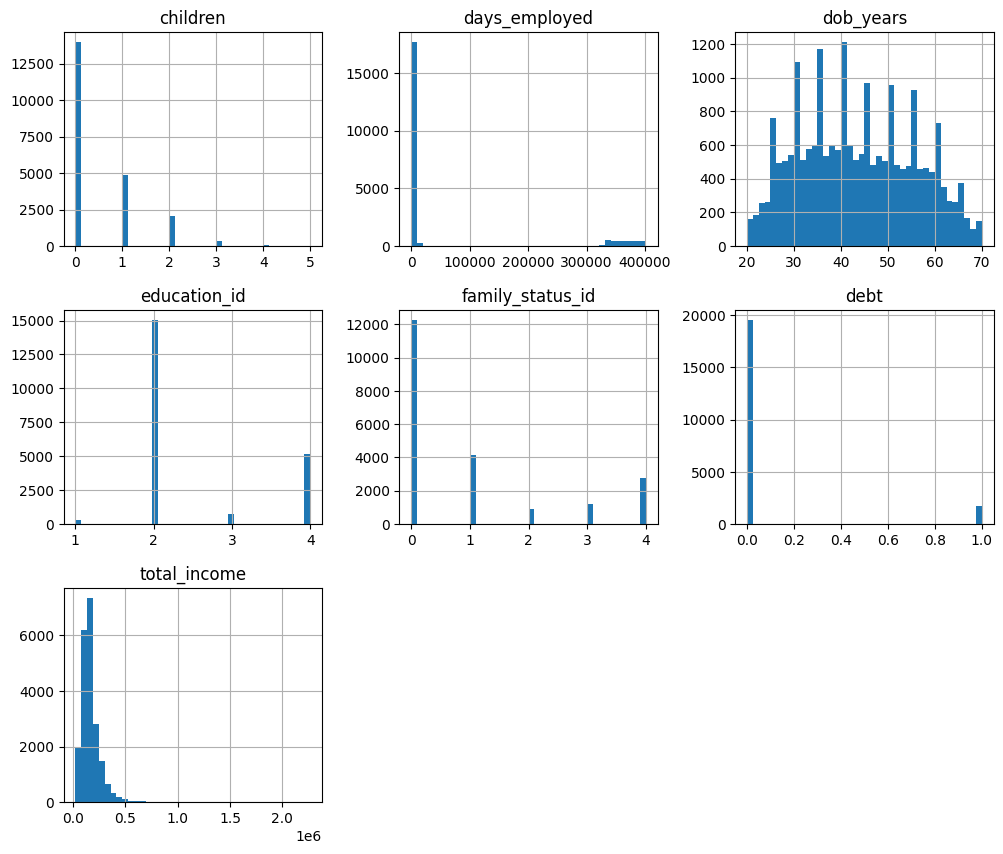

In [67]:
import matplotlib.pyplot as plt
#ToDo plot the feature statistics histogram
df.hist(bins=40, figsize = (12,10))
plt.title('Distribution of Numerical Features')
plt.show()

                  children  days_employed  dob_years  education_id  \
children          1.000000      -0.220478  -0.320335      0.032992   
days_employed    -0.220478       1.000000   0.563298     -0.110489   
dob_years        -0.320335       0.563298   1.000000     -0.148845   
education_id      0.032992      -0.110489  -0.148845      1.000000   
family_status_id -0.158191       0.001808  -0.070339      0.031088   
debt              0.024191      -0.043582  -0.071192     -0.057028   
total_income      0.028148      -0.116946  -0.050666      0.212720   

                  family_status_id      debt  total_income  
children                 -0.158191  0.024191      0.028148  
days_employed             0.001808 -0.043582     -0.116946  
dob_years                -0.070339 -0.071192     -0.050666  
education_id              0.031088 -0.057028      0.212720  
family_status_id          1.000000  0.020624     -0.007219  
debt                      0.020624  1.000000     -0.011986  
total_income

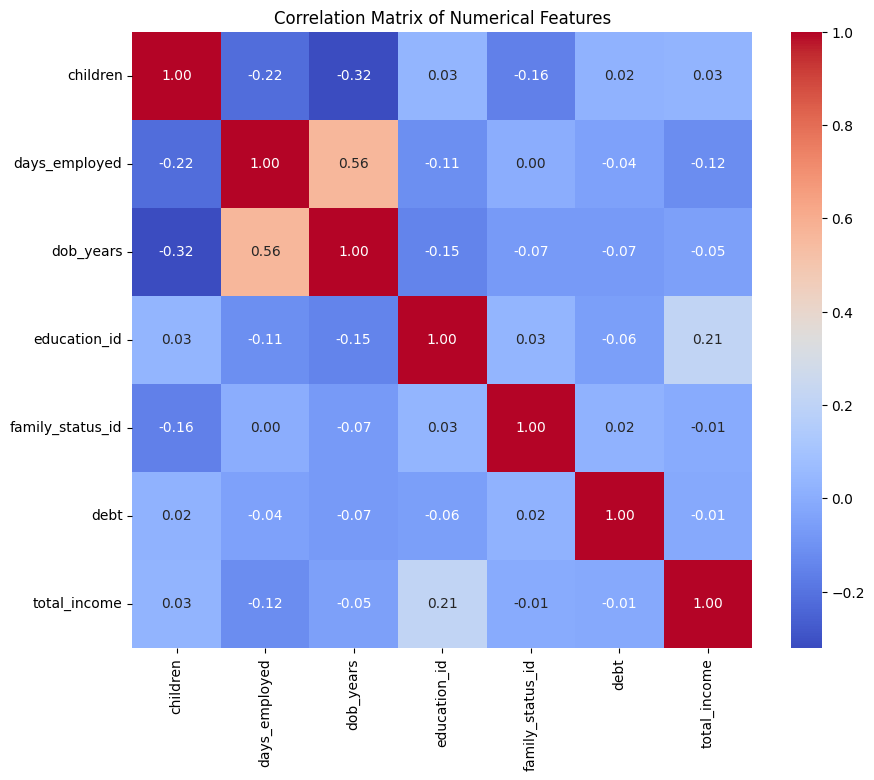

In [70]:
# ToDo plot the correlation matrix
import seaborn as sns
import numpy as np


numeric_df = df.select_dtypes(include = [np.number])
# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Print the correlation matrix
print(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


## Your conclusions

Look at the correlation results and the histograms.

- If you are to build a classifier that tries to predict the liklyhood of someone defaulting on their dept (this is indicated by the `debpt` label) do you think you will be able to do it with this dataset? Explain why and indicate which features are likely to help or not help with this process.

Answer: **write answer**

### Predicting Default Likelihood

If we were to build a classifier to predict the likelihood of someone defaulting on their debt (indicated by the `debt` label), it is possible to attempt it with this dataset, but it may be challenging. The correlation analysis shows that most numerical features have very weak correlations with the target variable, meaning that individually they are unlikely to strongly predict default.  

**Features likely to help:**  
- **Education (`education_id`)**: Higher education levels may be associated with better financial literacy and income stability, potentially reducing the likelihood of default.  
- **Family status (`family_status_id`)**: Marital or family situation could influence financial responsibilities and repayment ability.  
- **Income type (`income_type`)**: Employment type indicates income stability, which can affect repayment behavior.  
- **Loan purpose (`purpose_short`)**: The purpose of the loan may impact the risk of default, as loans for essential needs are less risky than luxury or speculative expenses.  

**Features likely not to help:**  
- Most numerical features such as `days_employed`, `children`, `dob_years`, and `total_income` show very low correlation with debt and are unlikely to provide strong predictive power individually.  

**Conclusion:**  
To build a useful classifier, emphasis should be placed on categorical features and possibly engineered features or combinations of variables, while numerical variables may need normalization, binning, or transformation to contribute meaningfully. Overall, predicting defaults is feasible but requires careful feature selection and possibly more data on client behavior.




- If you have a chance to extend your dataset with more data, what would be the type of data that you would like to get to improve the quality of your classifier?

Answer: **write answer**

### Extending the Dataset

To improve the quality of the classifier for predicting debt default, the dataset could be extended with additional features that provide more insight into the financial behavior and reliability of clients. Some useful types of data would include:

1. **Credit history information**  
   - Number of previous loans, past defaults, repayment timeliness, credit card usage.  
   - This directly indicates financial reliability and is highly predictive of future defaults.

2. **Detailed income and expense data**  
   - Monthly income, fixed expenses, savings, and discretionary spending.  
   - Helps estimate disposable income and ability to repay debts.

3. **Employment stability**  
   - Duration at current job, job changes, industry risk.  
   - More stable employment is correlated with lower default risk.

4. **Demographic and lifestyle information**  
   - Age, marital status, dependents, and residence type.  
   - Provides context about financial responsibilities and risk factors.

5. **Loan-specific information**  
   - Loan amount, interest rate, repayment terms, collateral, loan type.  
   - Helps in understanding risk associated with each loan individually.

6. **Behavioral data**  
   - Spending habits, online banking activity, transaction patterns.  
   - Machine learning models can use these to identify subtle risk patterns.

**Conclusion:**  
Adding such data would provide a more comprehensive picture of the client’s financial situation and behavior, significantly improving the predictive power of the classifier.

